In [28]:
#imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import plot_tree
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#carregar o dataset
data = load_breast_cancer()

In [3]:
#criar o dataframe do pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
#a variavel target é disponiblizada separadamente no dataset, para exploratória juntar é interssante.
df['target'] = data.target

In [4]:
#ver resumo do dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
#Verificando se existem valores nulos
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
#contar incidência de variavel alvo
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [7]:
#ver uma matriz de correlação
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


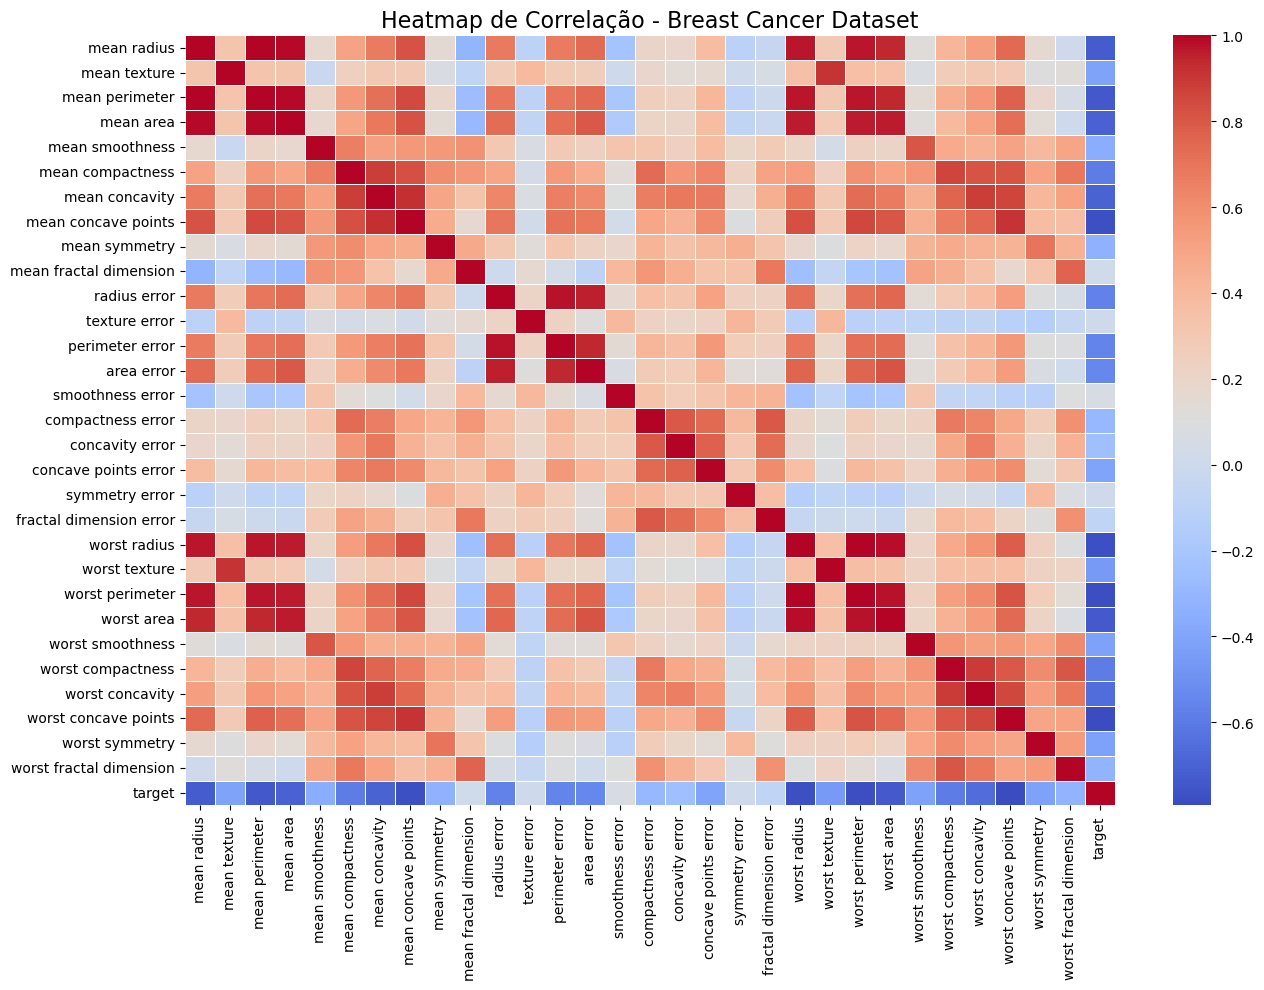

In [8]:
# a matriz acima é confusa de ver então vamos plotar um heatmap
matrizDeCorrelacao = df.corr()

# Plotar o heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrizDeCorrelacao, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlação - Breast Cancer Dataset', fontsize=16)
plt.show()

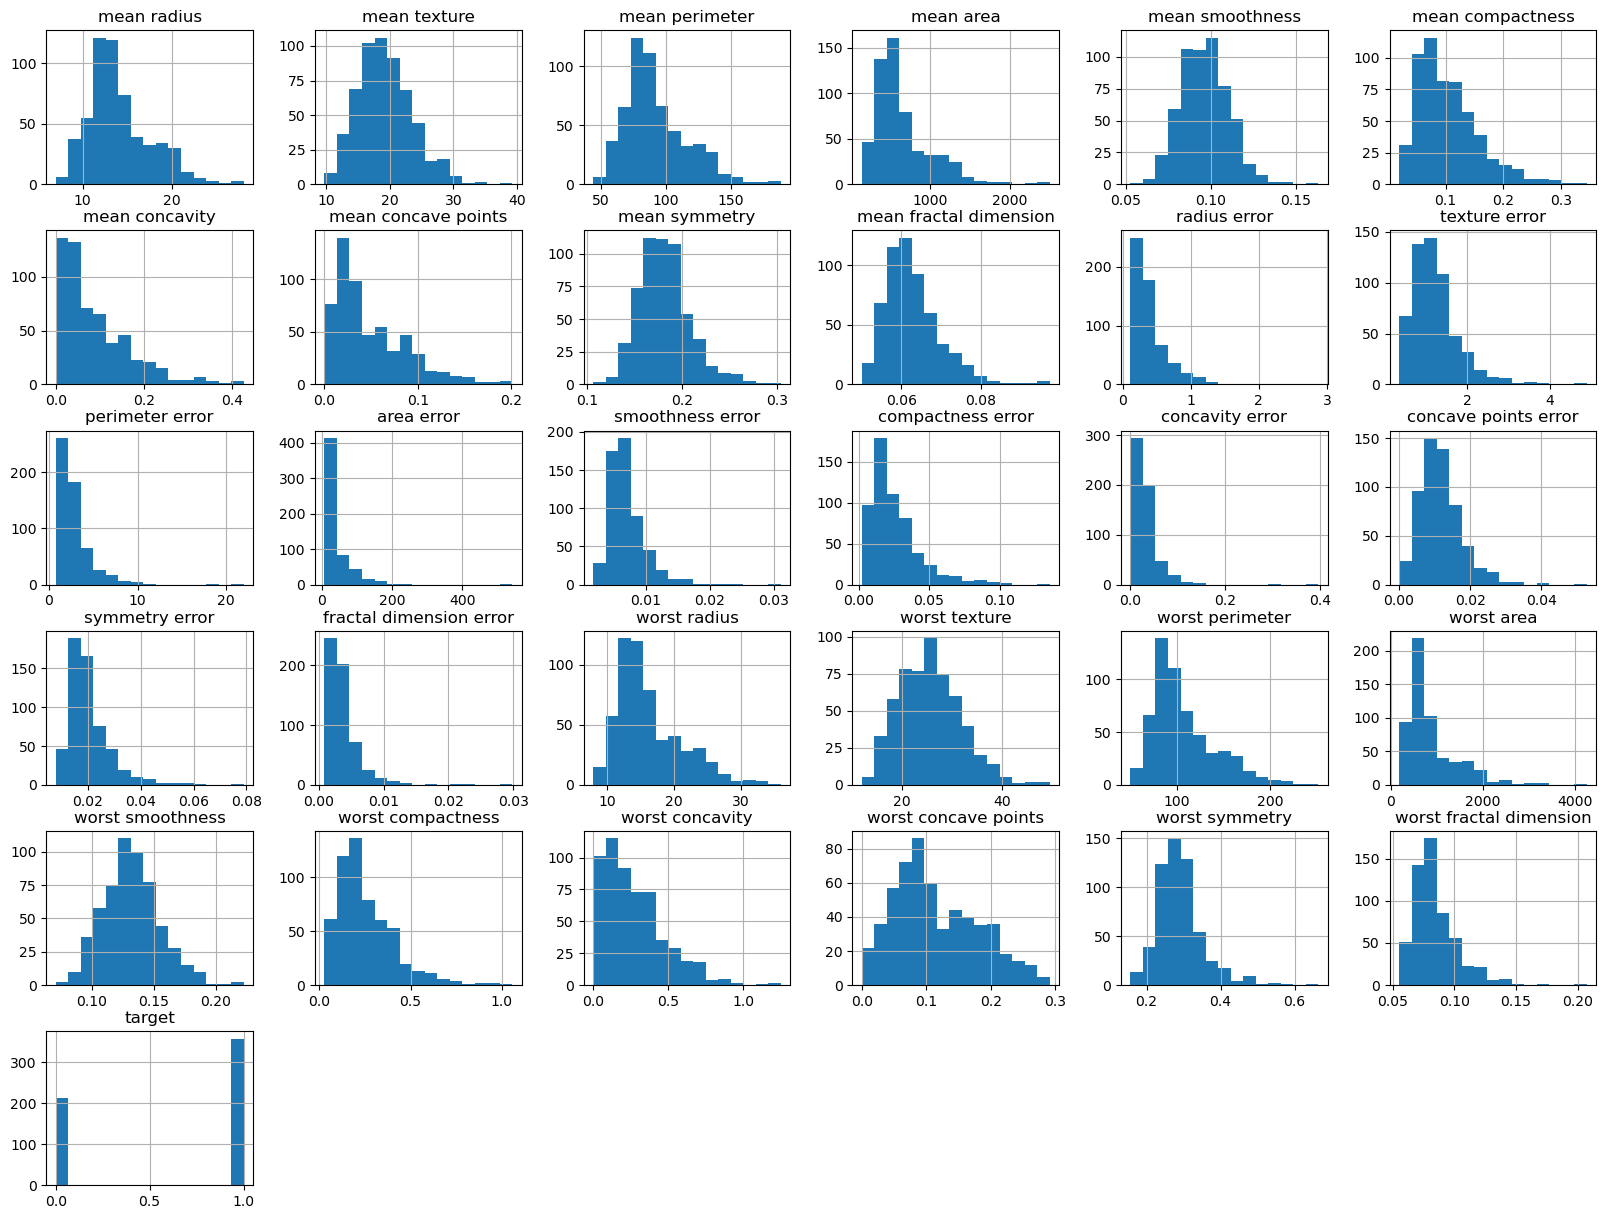

In [9]:
#plotar um histograma de todas as variáveis para ver sua distribuição
df.hist(bins=15, figsize=(20, 15))
plt.show()

c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

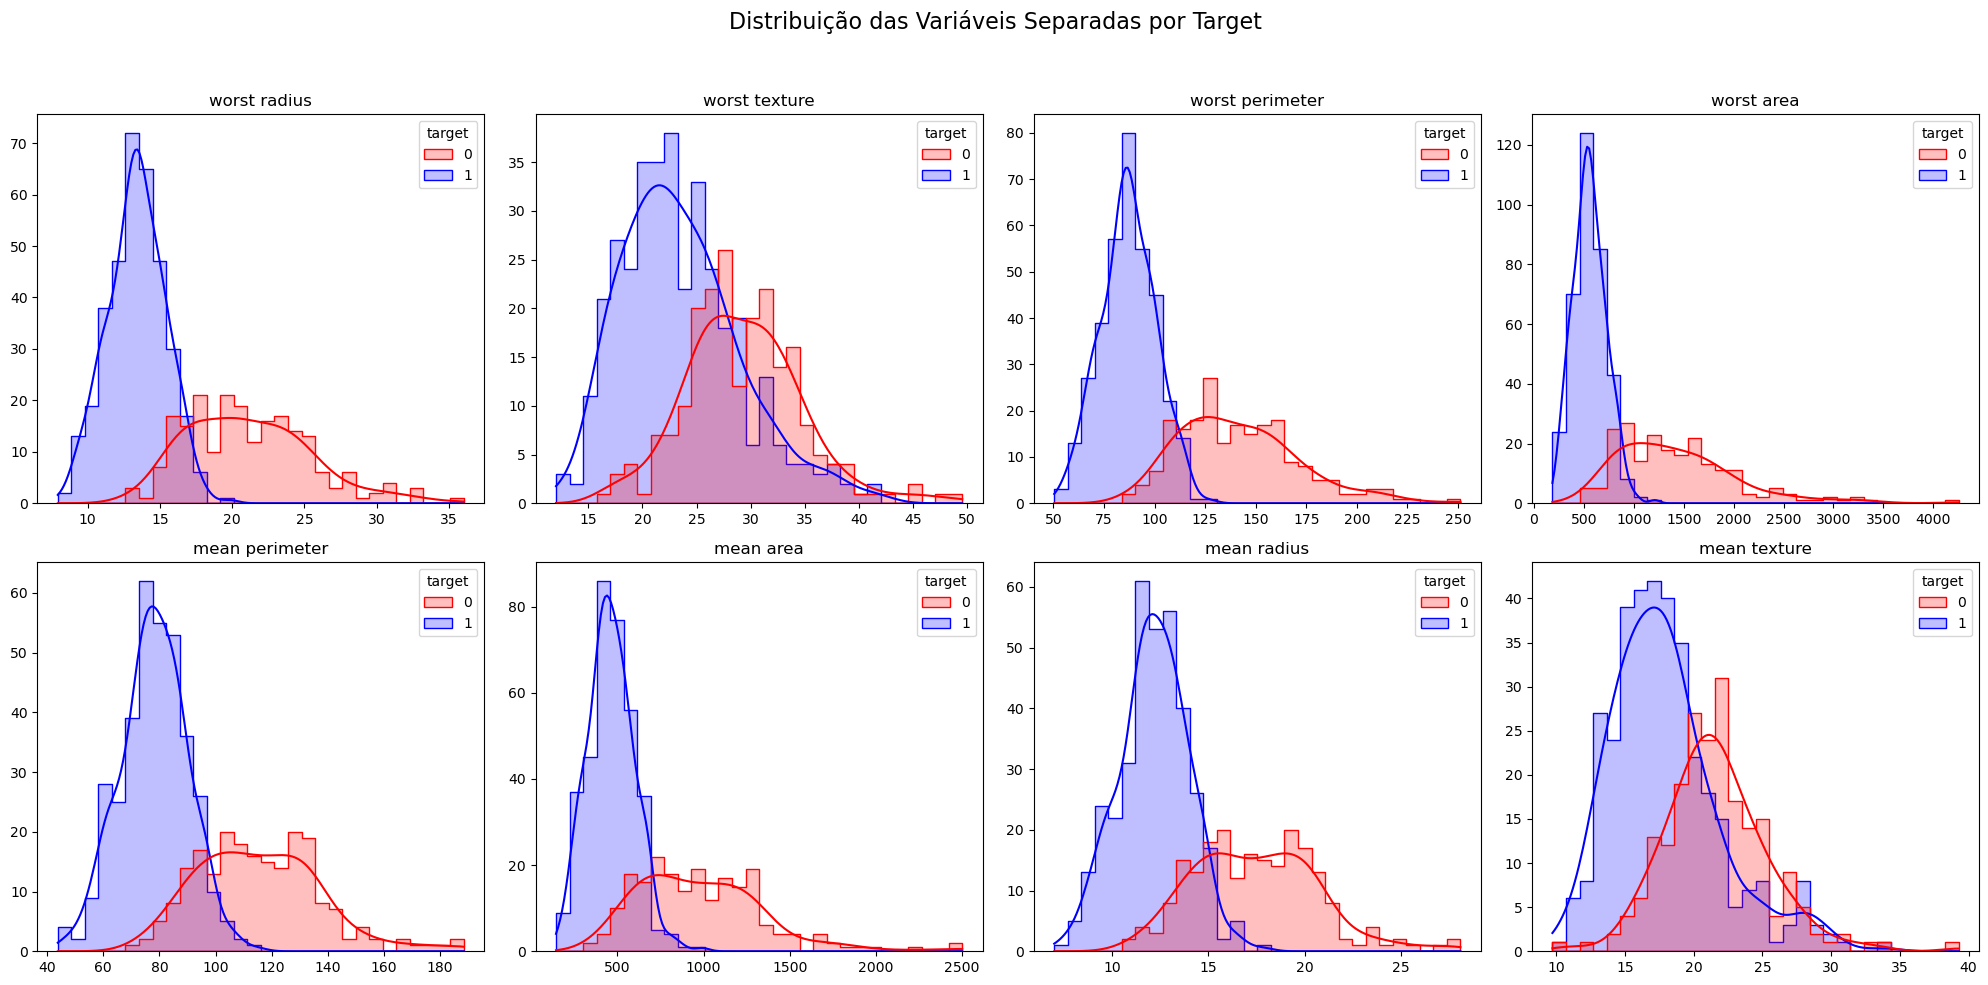

In [10]:
#farei histogramas com diversas variáveis porém as que se destacaram no heatmap e divido pelo target
# Lista das variáveis de interesse
variaveis = [
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'mean perimeter', 'mean area', 'mean radius', 'mean texture'
]

# Criar subplots (2 linhas, 4 colunas)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuição das Variáveis Separadas por Target', fontsize=16)

# Gerar histogramas para cada variável
for i, var in enumerate(variaveis):
    ax = axes[i // 4, i % 4]  # Organiza as variáveis nos subplots
    sns.histplot(data=df, x=var, hue='target', bins=30, kde=True, element="step", palette=['red', 'blue'], ax=ax)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

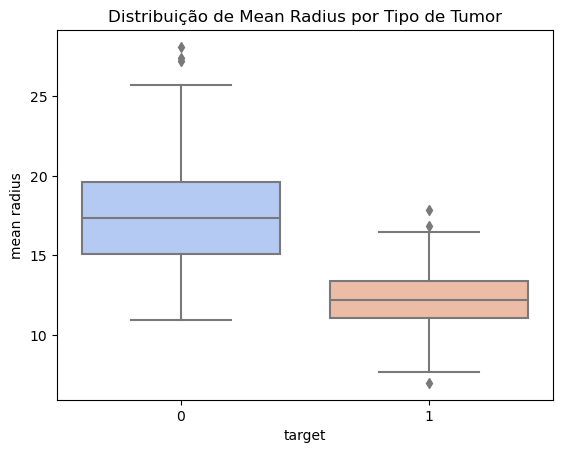

In [11]:
#Criando um boxplot para ver as estatísticas da variável Target
sns.boxplot(data=df, x='target', y='mean radius', palette='coolwarm')

# Título do gráfico
plt.title('Distribuição de Mean Radius por Tipo de Tumor')
plt.show()

In [12]:
# Definindo X (features) e y (target)
X = df.drop(columns='target')  # Remover a coluna target
y = df['target']  # Variável target

In [13]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Escalonamento dos dados 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Árvore de Decisão</h2>

In [15]:
# Criar e treinar o modelo
#Mantido a seed para reprodução
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Fazer previsões
y_pred = model.predict(X_test_scaled)

In [17]:
# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [18]:
#Verificar Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, 
                               columns=["Predito Benigno", "Predito Maligno"], 
                               index=["Real Benigno", "Real Maligno"])

# Exibindo a tabela
print(df_conf_matrix)

              Predito Benigno  Predito Maligno
Real Benigno               40                3
Real Maligno                3               68


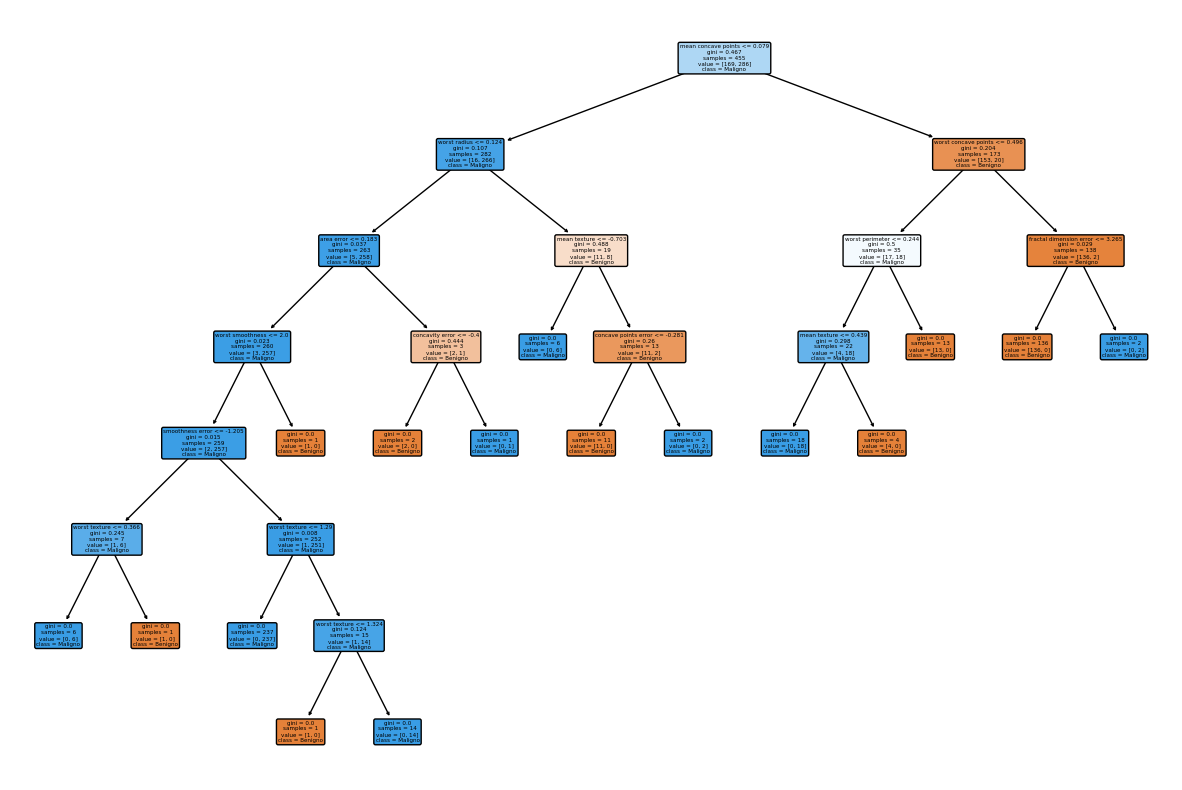

In [19]:
#Verificar o Resultado da Árvore
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Benigno', 'Maligno'], rounded=True)
plt.show()

<h2>KNN</h2>

In [26]:
# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Pode ajustar o número de vizinhos
knn.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar o modelo
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [27]:
#Acurácia do KNN
print(f'Acurácia do KNN: {acc_knn:.4f}')
print('Matriz de Confusão:')
print(cm_knn)

Acurácia do KNN: 0.9474
Matriz de Confusão:
[[40  3]
 [ 3 68]]


<h2>Naive Bayes</h2>

In [29]:
# Importar o Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Criar e treinar o modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_nb = nb.predict(X_test_scaled)

# Avaliar o modelo
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Exibir os resultados
print(f'Acurácia do Naive Bayes: {acc_nb:.4f}')
print('Matriz de Confusão:')
print(cm_nb)

Acurácia do Naive Bayes: 0.9649
Matriz de Confusão:
[[40  3]
 [ 1 70]]
